In [57]:
import matplotlib.pyplot as plt
import time as t
from math import *
from decimal import Decimal, getcontext
from prettytable import PrettyTable

In [58]:
def bailey_borwein_plouffe(n, buffer):
    getcontext().prec = n + buffer
    pi = Decimal(0)
    error = 1
    k = 0
    while error > 10**(-n):
        pi_old = pi
        term = (Decimal(4)/(8*k+1) - Decimal(2)/(8*k+4)
                - Decimal(1)/(8*k+5) - Decimal(1)/(8*k+6))
        pi += Decimal(16)**(-k) * term
        error = abs(pi - pi_old)
        k += 1

    return str(pi)[n + 1]


In [59]:
digits = "3."
pi_true = "3.141592653589793238462643383279502884197169399375105820974944"
for x in range(1, 61):
    digits += bailey_borwein_plouffe(x, 3)
print(f"Computed:\t{digits}")
print(f"True:\t\t{pi_true}")


Computed:	3.141592653589793238462643383279402884197169399375105820974944
True:		3.141592653589793238462643383279502884197169399375105820974944


In [60]:
def chudnovsky(n, buffer):
    getcontext().prec = n + buffer
    C = 426880 * Decimal(10005).sqrt()
    M, X = Decimal(1), Decimal(1)
    L, S = Decimal(13591409), Decimal(13591409)
    K = Decimal(-6)
    error = 1
    i = 0
    pi = C * X / (M * L)
    while error > 10**(-n):
        pi_old = pi
        K += 12
        M *= (K**3 - 16*K) / (i + 1)**3
        L += 545140134
        X *= -262537412640768000
        S += (M * L) / X
        pi = C / S
        error = abs(pi - pi_old)
        i += 1

    return str(pi)[n + 1]

In [63]:
digits = "3."
for x in range(1, 61):
    digits += chudnovsky(x, 3)
print(f"Computed:\t{digits}")
print(f"True:\t\t{pi_true}")

Computed:	3.141592653589793238462643383279502884197169499375105820974944
True:		3.141592653589793238462643383279502884197169399375105820974944


In [64]:
def borwein(n, buffer):
    getcontext().prec = n + buffer
    a = Decimal(2).sqrt()
    b = 0
    p = 2 + a
    error = 1
    while error > 10**(-n):
        p_old = p
        b = (1 + b)*a.sqrt()/(a + b)
        a = (a.sqrt() + 1/a.sqrt())/2
        p = (1 + a) * p * b / (1 + b)
        error = abs(p - p_old)
    
    return str(p)[n + 1]

In [65]:
digits = "3."
for x in range(1, 61):
    digits += borwein(x, 3)
print(f"Computed:\t{digits}")
print(f"True:\t\t{pi_true}")

Computed:	3.141592653589793238462643383279502884197169399375105820974944
True:		3.141592653589793238462643383279502884197169399375105820974944


In [72]:
sample_size = [x for x in range(1, 1001)]

In [73]:
ellapsed_time_bailey = []
ellapsed_time_chudnovsky = []
ellapsed_time_borwein = []
for n in sample_size:  
  start = t.time()
  bailey_borwein_plouffe(n, 3)
  end = t.time()
  ellapsed_time_bailey.append(end-start)

  start = t.time()
  chudnovsky(n, 3)
  end = t.time()
  ellapsed_time_chudnovsky.append(end-start)

  start = t.time()
  borwein(n, 3)
  end = t.time()
  ellapsed_time_borwein.append(end-start)

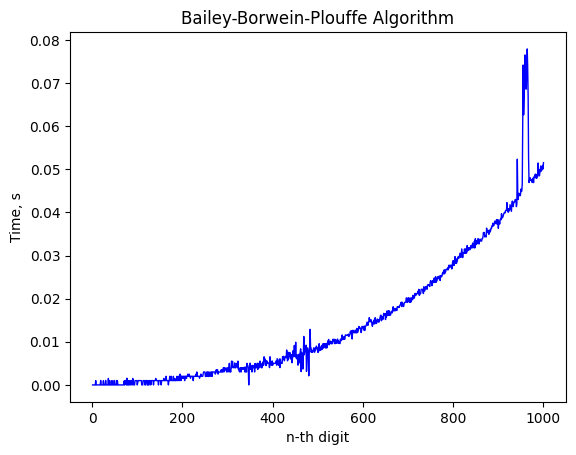

In [90]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_bailey, linewidth=1, color="blue")
ax.set_xlabel("n-th digit")
ax.set_ylabel("Time, s")
ax.set_title("Bailey-Borwein-Plouffe Algorithm")

plt.show()

In [95]:
table = PrettyTable()
table.field_names = ["n-th digit"] + sample_size[::69] + [1000]
table.add_row(["Time, s"] + [round(x, 4) for x in (ellapsed_time_bailey[::69] + [ellapsed_time_bailey[-1]])])
table

n-th digit,1,70,139,208,277,346,415,484,553,622,691,760,829,898,967,1000
"Time, s",0.0,0.0,0.001,0.002,0.0035,0.004,0.006,0.0086,0.0105,0.0146,0.0187,0.0238,0.0305,0.0373,0.0525,0.0515


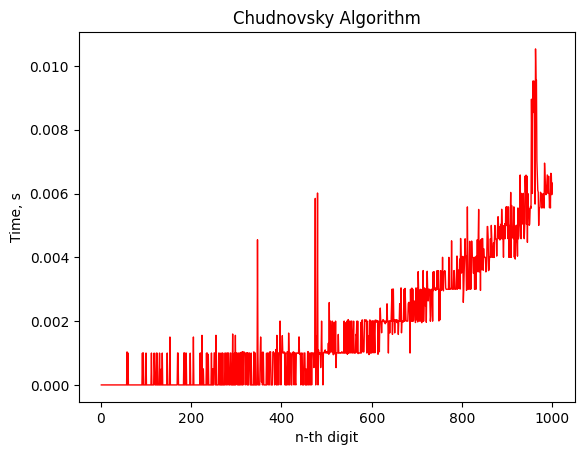

In [89]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_chudnovsky, linewidth=1, color="r")
ax.set_xlabel("n-th digit")
ax.set_ylabel("Time, s")
ax.set_title("Chudnovsky Algorithm")

plt.show()

In [96]:
table = PrettyTable()
table.field_names = ["n-th digit"] + sample_size[::69] + [1000]
table.add_row(["Time, s"] + [round(x, 4) for x in (ellapsed_time_chudnovsky[::69] + [ellapsed_time_chudnovsky[-1]])])
table

n-th digit,1,70,139,208,277,346,415,484,553,622,691,760,829,898,967,1000
"Time, s",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0014,0.0016,0.003,0.0036,0.004,0.0056,0.0065,0.0063


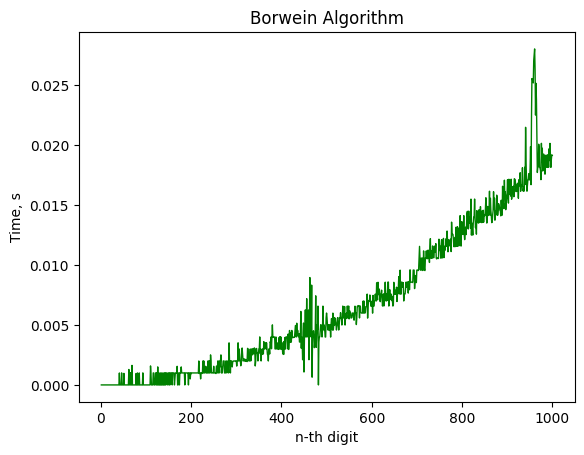

In [92]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_borwein, linewidth=1, color="g")
ax.set_xlabel("n-th digit")
ax.set_ylabel("Time, s")
ax.set_title("Borwein Algorithm")

plt.show()

In [97]:
table = PrettyTable()
table.field_names = ["n-th digit"] + sample_size[::69] + [1000]
table.add_row(["Time, s"] + [round(x, 4) for x in (ellapsed_time_borwein[::69] + [ellapsed_time_borwein[-1]])])
table

n-th digit,1,70,139,208,277,346,415,484,553,622,691,760,829,898,967,1000
"Time, s",0.0,0.0,0.0,0.001,0.002,0.0026,0.0043,0.004,0.006,0.0079,0.0086,0.0106,0.014,0.0152,0.0177,0.0192


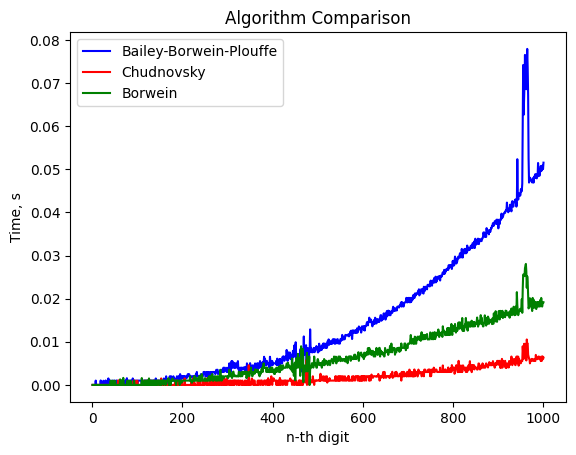

In [94]:
# plotting multiple curves simultaneously
plt.plot(sample_size, ellapsed_time_bailey, color='b', label='Bailey-Borwein-Plouffe')
plt.plot(sample_size, ellapsed_time_chudnovsky, color='r', label='Chudnovsky')
plt.plot(sample_size, ellapsed_time_borwein, color='g', label='Borwein')
  
plt.xlabel("n-th digit")
plt.ylabel("Time, s")
plt.title("Algorithm Comparison")
  
plt.legend()  
plt.show()